In [110]:
import numpy as np
import pandas as pd
from statistics import stdev
import matplotlib.pyplot as plt
import math
from scipy import stats
from collections import Counter
import pickle
import time
pd.options.display.max_rows = 9999

In [2]:
files= [f'https://raw.githubusercontent.com/hmku/mwtc-2020/master/case1/Data/201{i}.csv' for i in range(10)]
dfs = [pd.read_csv(file) for file in files]
dfs

[     Unnamed: 0  CONSUMPTION  AVG_PRICE
 0    2010-01-01     0.000000   0.000000
 1    2010-01-02     0.447285   2.000000
 2    2010-01-03    14.339777   2.000000
 3    2010-01-04    17.388527   2.000000
 4    2010-01-05    28.372350   2.000000
 5    2010-01-06    42.239128   2.000000
 6    2010-01-07    51.683224   2.000000
 7    2010-01-08    62.138573   2.000000
 8    2010-01-09    72.218965   2.000000
 9    2010-01-10    73.964033   2.000000
 10   2010-01-11    95.225155   2.000000
 11   2010-01-12   105.287283   2.000000
 12   2010-01-13   109.550969   2.000000
 13   2010-01-14   124.628878   2.000000
 14   2010-01-15   165.134694   2.000000
 15   2010-01-16   186.509623   2.000000
 16   2010-01-17   187.512084   2.000000
 17   2010-01-18   191.201534   2.000000
 18   2010-01-19   194.690197   2.000000
 19   2010-01-20   202.859792   2.000000
 20   2010-01-21   206.384068   2.000000
 21   2010-01-22   222.305606   2.000000
 22   2010-01-23   226.488839   2.000000
 23   2010-01-24

In [3]:
# helper function for plotting
def plot(df, *args, cs=False):
    if len(args) == 0:
        args = list(df.columns)
    dft = pd.DataFrame()
    for arg in args:
        dft[arg] = df[arg].cumsum() if cs else df[arg]
    dft.plot(figsize=(15, 10), y=args)

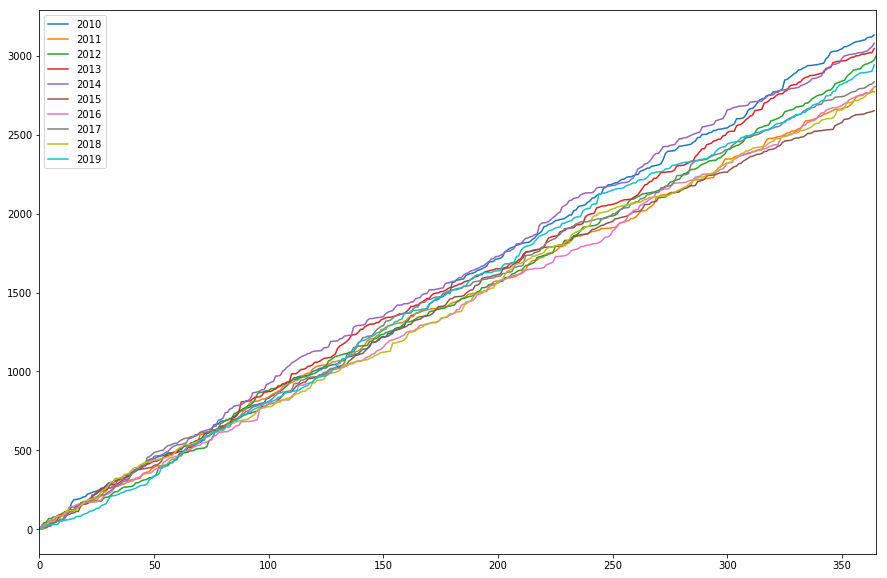

In [4]:
cons = pd.concat([df['CONSUMPTION'] for df in dfs], axis=1)
cons.columns = list(range(2010, 2020))
plot(cons)

In [5]:
dfs_filtered = []
for i in range(10):
    ch = dfs[i]['AVG_PRICE'].diff()
    avg = dfs[i]['AVG_PRICE']
    dfs_filtered.append(dfs[i][avg <= 3.01][ch != 0])
dfs_filtered

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


[     Unnamed: 0  CONSUMPTION  AVG_PRICE
 0    2010-01-01     0.000000   0.000000
 1    2010-01-02     0.447285   2.000000
 160  2010-06-10  1318.734240   2.540627
 161  2010-06-11  1326.127237   3.000000
 203  2010-07-23  1758.608405   3.001503,
      Unnamed: 0  CONSUMPTION  AVG_PRICE
 0    2011-01-01     0.000000   0.000000
 1    2011-01-02    10.684759   2.000000
 159  2011-06-09  1316.810398   2.709962
 160  2011-06-10  1323.333568   3.000000
 226  2011-08-15  1773.751202   3.001928,
      Unnamed: 0  CONSUMPTION  AVG_PRICE
 0    2012-01-01     0.000000   0.000000
 1    2012-01-02    22.931186   2.000000
 163  2012-06-12  1323.790684   2.807337
 164  2012-06-13  1330.994891   3.000000
 225  2012-08-13  1795.281139   3.002647,
      Unnamed: 0  CONSUMPTION  AVG_PRICE
 0    2013-01-01     0.000000   0.000000
 1    2013-01-02     2.002354   2.000000
 150  2013-05-31  1333.103923   2.171875
 151  2013-06-01  1339.541339   3.000000
 221  2013-08-10  1820.514166   3.005721,
      Unname

* Daily consmption differences
* Distribution of the daily consumption
* Momentum trading for consumption

In [16]:
cons_daily = pd.concat([df['CONSUMPTION'].diff() for df in dfs], axis=0).dropna()
cons_daily

1       0.447285
2      13.892492
3       3.048750
4      10.983823
5      13.866778
6       9.444096
7      10.455349
8      10.080391
9       1.745068
10     21.261123
11     10.062127
12      4.263686
13     15.077909
14     40.505816
15     21.374929
16      1.002461
17      3.689450
18      3.488663
19      8.169594
20      3.524276
21     15.921538
22      4.183234
23      6.079387
24      3.741992
25      4.878587
26      7.046980
27     11.193725
28      3.676666
29     12.427215
30     16.221878
31      2.737774
32      6.539902
33      1.223270
34      2.271939
35      8.809531
36      2.983681
37     10.559777
38      1.833239
39      4.633816
40     17.215739
41      7.460895
42     19.538425
43      2.751740
44      0.227435
45     16.366795
46      4.111308
47     15.118161
48     24.811722
49      4.439109
50      0.368548
51      8.097694
52      5.873813
53      3.728832
54      2.370601
55      5.495327
56     10.751370
57      1.205453
58      1.111420
59      0.0119

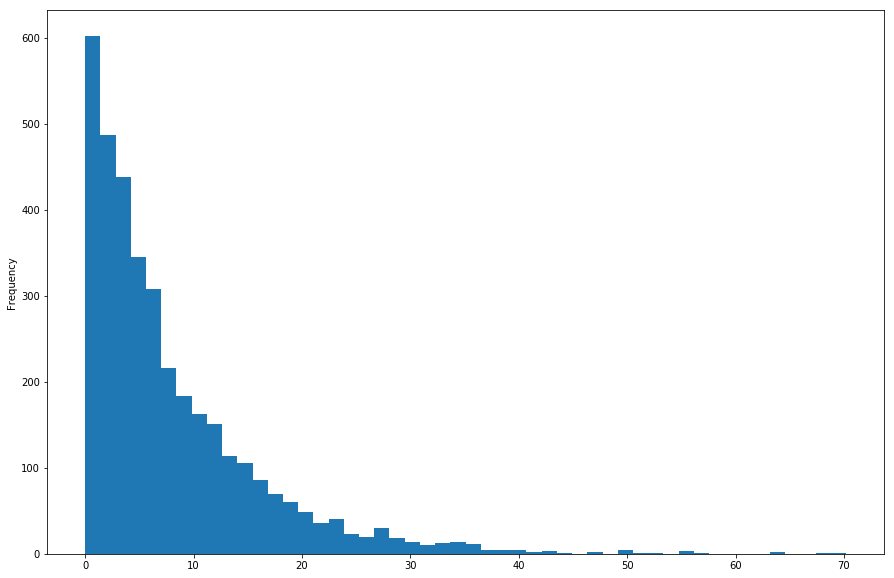

In [17]:
cons_daily.plot.hist(bins=50, figsize=(15, 10))

In [18]:
print(cons_daily.mean())
print(cons_daily.std())

7.984892910269743
8.183686529501607


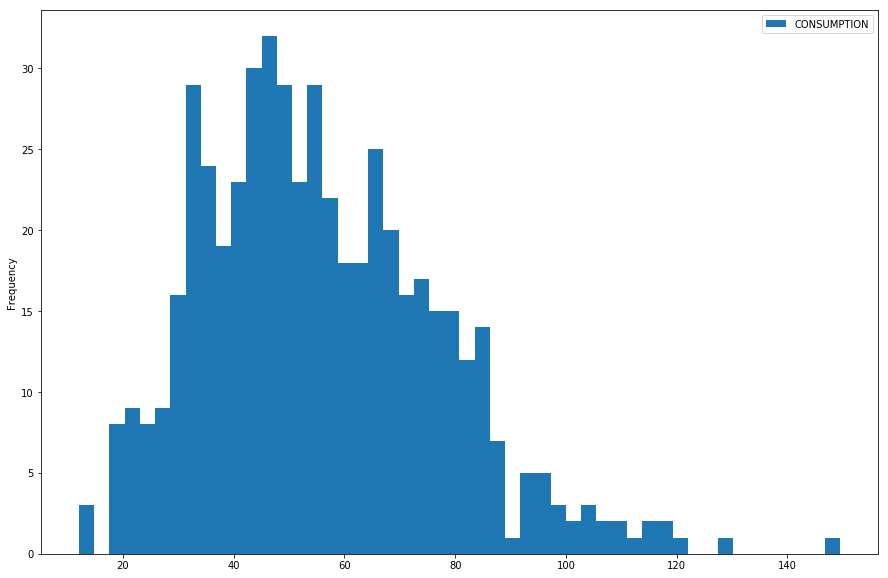

In [42]:
cons_daily_noindex = cons_daily.reset_index().drop(['index'], axis=1)
cons_weekly = cons_daily_noindex.groupby(cons_daily_noindex.index // 7).sum()
cons_weekly.plot.hist(bins=50, figsize=(15, 10))

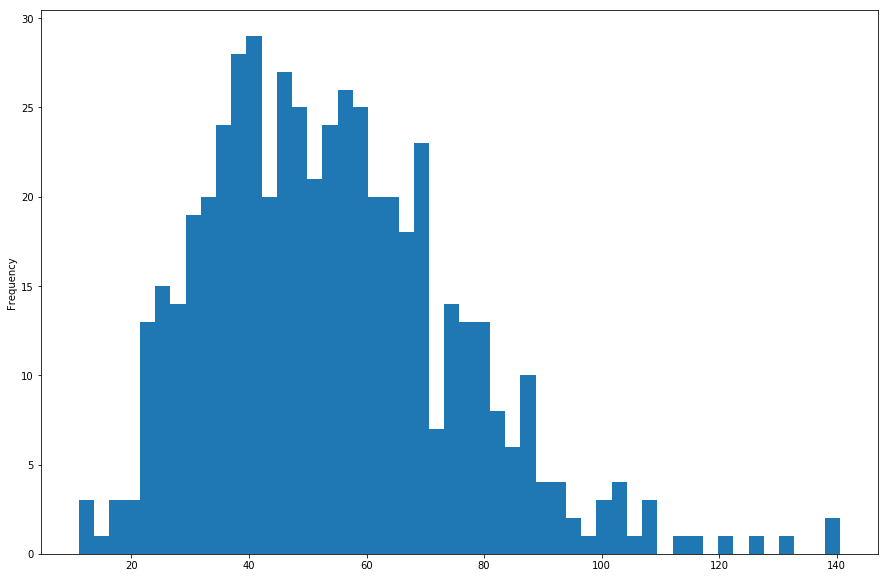

In [65]:
fake_weekly = pd.Series([cons_daily_noindex.sample(7).sum()[0] for i in range(3650 // 7)])
fake_weekly.plot.hist(bins=50, figsize=(15, 10))

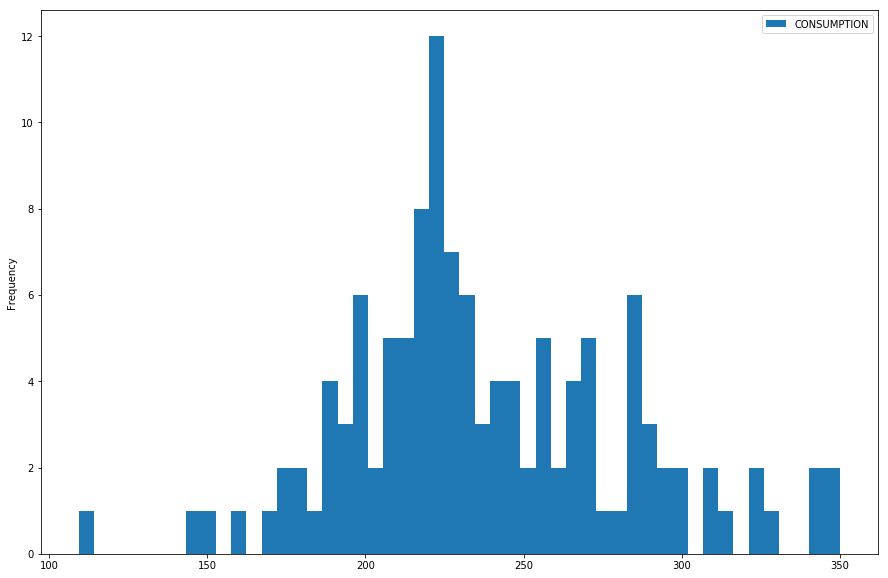

In [43]:
cons_monthly = cons_daily_noindex.groupby(cons_daily_noindex.index // 30).sum()
cons_monthly.plot.hist(bins=50, figsize=(15, 10))

### generate cdf

In [114]:
n = 10000
cdfs = []
mins = [0]
for i in range(1, 366):
    start = time.time()
    c = Counter()
    m = int(n / math.sqrt(i))
    for _ in range(m):
        c[math.ceil(cons_daily_noindex.sample(i).sum()[0])] += 1/m
    l = [c[j + min(c)] for j in range(max(c) - min(c) + 1)]
    cdfs.append(list(np.around(np.cumsum(l), math.ceil(math.log10(m)))))
    mins.append(min(c))
    print(f"finish {i}, time elapsed = {time.time() - start}s")
cdfs.insert(0, mins)
with open('cdf_file', 'wb+') as cdf_file:
    pickle.dump(cdfs, cdf_file)
cdfs

finish 1, time elapsed = 10.734301805496216s
finish 2, time elapsed = 7.674730062484741s
finish 3, time elapsed = 6.130652904510498s
finish 4, time elapsed = 5.567405939102173s
finish 5, time elapsed = 4.938259840011597s
finish 6, time elapsed = 4.783443212509155s
finish 7, time elapsed = 4.662585973739624s
finish 8, time elapsed = 3.908313035964966s
finish 9, time elapsed = 3.5548558235168457s
finish 10, time elapsed = 3.3452470302581787s
finish 11, time elapsed = 3.348209857940674s
finish 12, time elapsed = 3.1541659832000732s
finish 13, time elapsed = 2.952955961227417s
finish 14, time elapsed = 2.8279531002044678s
finish 15, time elapsed = 2.728614091873169s
finish 16, time elapsed = 2.7294719219207764s
finish 17, time elapsed = 2.800663709640503s
finish 18, time elapsed = 2.5232980251312256s
finish 19, time elapsed = 2.460847854614258s
finish 20, time elapsed = 2.4090709686279297s
finish 21, time elapsed = 2.360445261001587s
finish 22, time elapsed = 2.331291913986206s
finish 23, 

finish 179, time elapsed = 0.8176288604736328s
finish 180, time elapsed = 0.887347936630249s
finish 181, time elapsed = 1.0381402969360352s
finish 182, time elapsed = 0.8157749176025391s
finish 183, time elapsed = 0.8047671318054199s
finish 184, time elapsed = 0.829265832901001s
finish 185, time elapsed = 0.7983098030090332s
finish 186, time elapsed = 0.8071258068084717s
finish 187, time elapsed = 0.8342950344085693s
finish 188, time elapsed = 0.9217321872711182s
finish 189, time elapsed = 0.8045778274536133s
finish 190, time elapsed = 0.8387997150421143s
finish 191, time elapsed = 0.8157491683959961s
finish 192, time elapsed = 0.8060770034790039s
finish 193, time elapsed = 0.7895607948303223s
finish 194, time elapsed = 0.8112549781799316s
finish 195, time elapsed = 0.826848030090332s
finish 196, time elapsed = 0.7804858684539795s
finish 197, time elapsed = 0.761132001876831s
finish 198, time elapsed = 0.7783949375152588s
finish 199, time elapsed = 0.7918529510498047s
finish 200, time 

finish 355, time elapsed = 0.5925230979919434s
finish 356, time elapsed = 0.6030700206756592s
finish 357, time elapsed = 0.5898959636688232s
finish 358, time elapsed = 0.6581480503082275s
finish 359, time elapsed = 0.6251850128173828s
finish 360, time elapsed = 0.7160999774932861s
finish 361, time elapsed = 0.7482891082763672s
finish 362, time elapsed = 0.5907800197601318s
finish 363, time elapsed = 0.5820198059082031s
finish 364, time elapsed = 0.5977249145507812s
finish 365, time elapsed = 0.5642528533935547s


[[0,
  1,
  1,
  1,
  2,
  4,
  5,
  12,
  11,
  15,
  21,
  23,
  23,
  31,
  36,
  37,
  48,
  47,
  44,
  54,
  63,
  72,
  84,
  87,
  82,
  79,
  97,
  100,
  115,
  120,
  126,
  122,
  132,
  131,
  120,
  154,
  151,
  146,
  150,
  163,
  190,
  193,
  180,
  197,
  197,
  215,
  223,
  203,
  219,
  242,
  223,
  240,
  233,
  272,
  278,
  257,
  293,
  288,
  276,
  289,
  261,
  298,
  320,
  318,
  346,
  307,
  334,
  351,
  300,
  334,
  371,
  371,
  385,
  381,
  408,
  393,
  380,
  420,
  417,
  413,
  443,
  442,
  431,
  463,
  435,
  442,
  487,
  475,
  503,
  484,
  518,
  467,
  476,
  542,
  489,
  543,
  546,
  553,
  566,
  557,
  558,
  591,
  584,
  588,
  568,
  628,
  627,
  607,
  635,
  652,
  623,
  645,
  600,
  624,
  678,
  681,
  654,
  720,
  697,
  711,
  694,
  681,
  695,
  733,
  744,
  770,
  741,
  706,
  710,
  756,
  753,
  807,
  806,
  818,
  801,
  811,
  825,
  793,
  807,
  887,
  844,
  819,
  901,
  863,
  859,
  896,
  888,
  924

In [115]:
with open('cdf_file', 'rb') as cdf_file:
    cdfs_loaded = pickle.load(cdf_file)
cdfs_loaded == cdfs

True

expected mean = 798.4892910269742


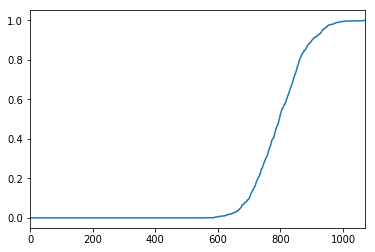

In [126]:
days_left = 100
pd.Series([0 for i in range(cdfs[0][days_left])] + cdfs[days_left]).plot()
print("expected mean = " + str(days_left * cons_daily.mean()))